# Analisis de Autos Usados

Lucho Feb|2023 <br>
Ton Visage By Frero Delevega


## ¿Qué es la Matriz de Lasso?

**Lasso (Least Absolute Shrinkage and Selection Operator)** es una técnica de regularización utilizada en modelos de regresión lineal. Su objetivo principal es prevenir el sobreajuste (overfitting) y mejorar la interpretabilidad del modelo al reducir algunos coeficientes exactamente a cero.

### ¿En qué consiste?

Lasso agrega una penalización basada en la **suma de los valores absolutos** de los coeficientes al término de pérdida del modelo. Matemáticamente, la función de costo de Lasso es:

\[
\text{Costo}_{Lasso} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p}|\beta_j|
\]

Donde:

- \( y_i \) es el valor real
- \( \hat{y}_i \) es el valor predicho
- \( \beta_j \) son los coeficientes del modelo
- \( \lambda \) es el parámetro de regularización
- \( n \) es el número de muestras
- \( p \) es el número de características (features)

### ¿Qué es la "matriz de Lasso"?

En un sentido estricto, **no existe una matriz específica llamada "matriz de Lasso"**, pero en el proceso de entrenamiento del modelo Lasso se utilizan:

- La **matriz de características \(X\)**: que contiene los datos de entrada (tamaño \(n \times p\))
- El **vector de salida \(y\)**: que contiene las etiquetas o valores objetivo
- Un modelo que encuentra los coeficientes \( \beta \) resolviendo un problema de optimización regularizado

En resumen, cuando se menciona la "matriz de Lasso", se puede estar refiriendo informalmente a la **matriz de diseño \(X\)** utilizada durante el entrenamiento del modelo Lasso.

### Ventajas de Lasso

- Realiza **selección de variables** automáticamente (al reducir coeficientes a cero).
- Mejora la **interpretabilidad** del modelo.
- Controla el **sobreajuste**, especialmente cuando hay muchas variables.

### Cuándo Usar Lasso

- Cuando se sospecha que muchas variables no aportan información útil.
- Cuando se desea un modelo más simple y fácil de interpretar.

---

> 💡 Nota: Lasso es especialmente útil cuando hay más características que observaciones o cuando existe multicolinealidad entre las variables.


### Conjunto de Datos de Autos Usados

Este conjunto de datos contiene información sobre autos usados.  
Estos datos pueden ser utilizados para diversos fines, como la predicción de precios para ejemplificar el uso de la regresión lineal en el Aprendizaje Automático (Machine Learning).

#### Las columnas del conjunto de datos son las siguientes:

- **name**: nombre  
- **year**: año  
- **selling_price**: precio de venta  
- **km_driven**: kilómetros recorridos  
- **fuel**: tipo de combustible  
- **seller_type**: tipo de vendedor  
- **transmission**: tipo de transmisión  
- **Owner**: propietario (número de dueños anteriores)

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Import Dataset| Data proccesing & Data Collection

In [2]:
df = pd.read_csv(r"car_data.csv")
df_raw = df.copy()
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [6]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Entrenamiento & Data training

In [8]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [9]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [10]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#### Training & test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

### Entrenamiento del modelo

#### Regresion Lineal

In [12]:
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Evaluacion del modelo

In [14]:
training_data_prediction = lin_reg_model.predict(X_train)

In [15]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493695


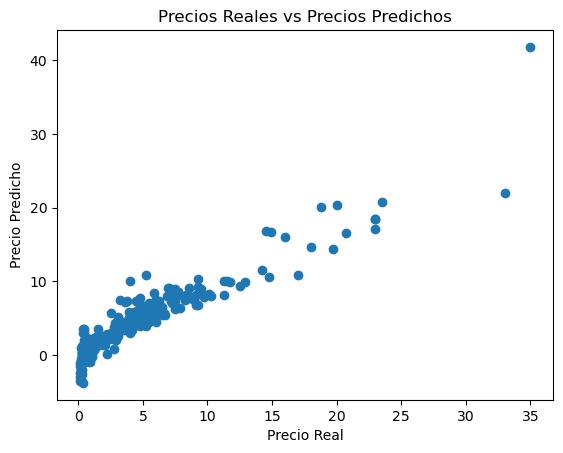

In [16]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precios Reales vs Precios Predichos")
plt.show()

In [17]:
test_data_prediction = lin_reg_model.predict(X_test)

In [18]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026903


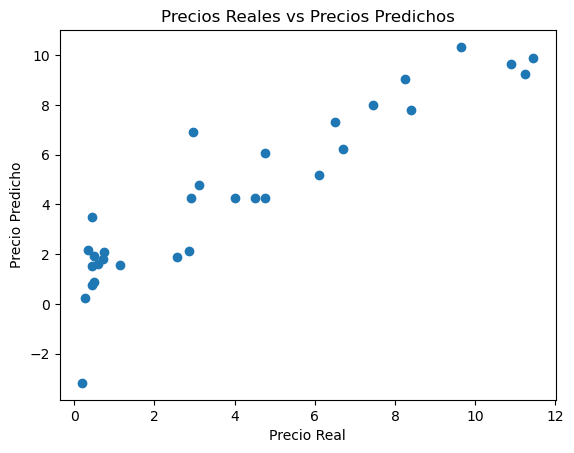

In [19]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precios Reales vs Precios Predichos")
plt.show()

#### Regresion de Lasso

In [20]:
lass_reg_model = Lasso()

In [21]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [22]:
training_data_prediction = lass_reg_model.predict(X_train)

In [23]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


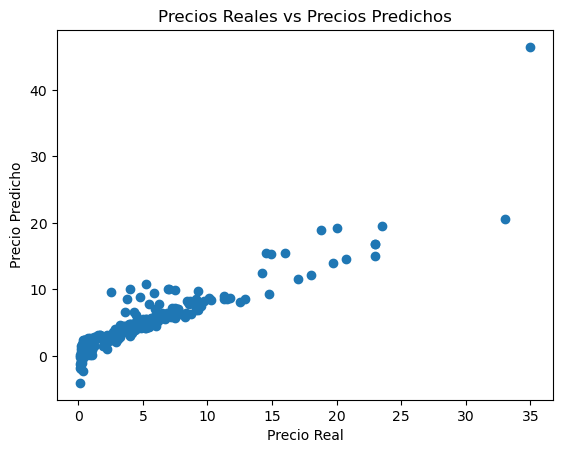

In [24]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precios Reales vs Precios Predichos")
plt.show()


In [25]:
test_data_prediction = lass_reg_model.predict(X_test)

In [26]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


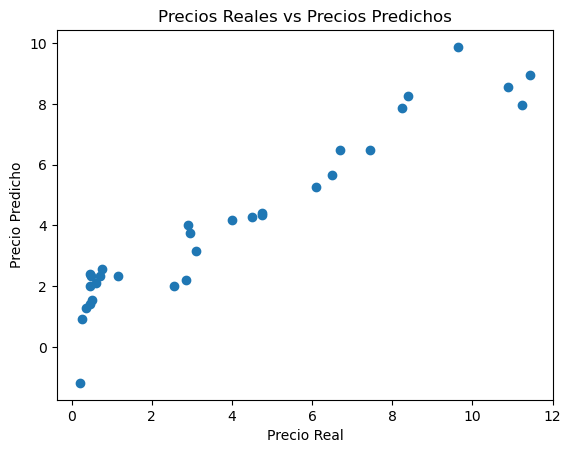

In [27]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precios Reales vs Precios Predichos")
plt.show()
